# J1 – Statistics

In [1]:
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## EDA

### Paiments Olist

Ouvrez `olist_order_payments.csv` et réalisez les différentes requêtes d'opération statistiques ci-dessous.

In [3]:
olist = pd.read_csv('olist_order_payments_dataset.csv')
olist

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [4]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
olist.payment_value.describe().to_frame()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


In [8]:
olist['payment_value'].value_counts()

50.00      324
20.00      274
100.00     255
77.57      250
35.00      165
          ... 
264.64       1
1071.83      1
563.95       1
38.07        1
363.31       1
Name: payment_value, Length: 29077, dtype: int64

In [9]:
olist['payment_value'].isna().value_counts()

False    103886
Name: payment_value, dtype: int64

## Statistiques descriptives

In [10]:
np.mean(olist.payment_value)

154.10038041698365

In [11]:
np.median(olist.payment_value)

100.0

In [12]:
np.var(olist.payment_value)

47303.21247430867

In [13]:
st.mode(olist.payment_value)

ModeResult(mode=array([50.]), count=array([324]))

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

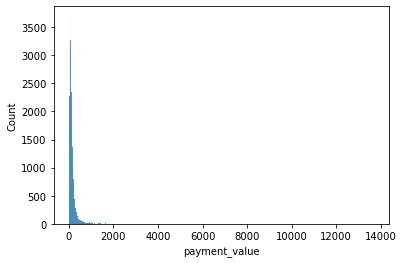

In [14]:
sns.histplot(olist['payment_value'])

(0.0, 1000.0)

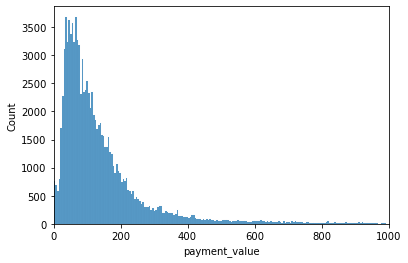

In [15]:
sns.histplot(olist['payment_value'])
plt.xlim([0,1000])

C:\Users\azade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_value'>

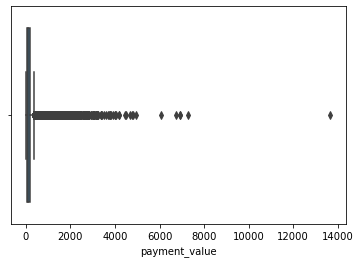

In [16]:
sns.boxplot(olist['payment_value'])

C:\Users\azade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 500.0)

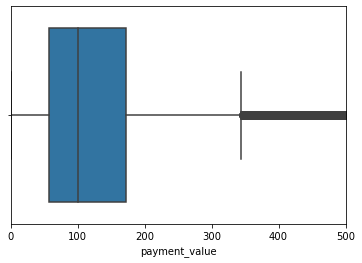

In [17]:
sns.boxplot(olist['payment_value'])
plt.xlim([0,500])

In [18]:
np.corrcoef(olist.payment_value, olist.payment_installments)

array([[1.        , 0.33081084],
       [0.33081084, 1.        ]])

In [19]:
olist['payment_value'].corr(olist['payment_installments'])

0.3308108445189853

<AxesSubplot:>

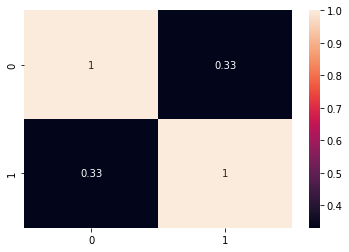

In [20]:
sns.heatmap(np.corrcoef(olist.payment_value, olist.payment_installments),annot=True)

### Probabilités avec Numpy – Simuler des lois statistiques

* Nombres aléatoires

In [21]:
# nombre aléatoire dans le sous-package random
np.random.random()

0.07126593960121741

In [22]:
# l'attribut size permet de choisir la taille de l'array
np.random.random(size=(2, 5))

array([[0.66232657, 0.40335644, 0.07296428, 0.02458101, 0.69979427],
       [0.20419468, 0.75891551, 0.36083995, 0.57150036, 0.09909991]])

In [23]:
#choisi un entier aléatoire
np.random.randint(1000)

484

In [24]:
#choisi cinq entiers aléatoires entre entre 100 et 1000
np.random.randint(100, 1000, size=5)

array([849, 943, 225, 198, 560])

* Variables aléatoires (tirer des échantillons depuis une distribution spécifique)

In [25]:
# choisi 4 valeurs entre 0 et 10 selon une loi uniforme
np.random.uniform(0, 10, size=4)

array([1.75966464, 7.54115299, 8.44563621, 8.27153944])

In [26]:
# choisi 2 valeurs deux fois de suite avec loc = moyenne et sclae = ecart type selon une loi normale
np.random.normal(loc=10, scale=1e-5, size=(2,2))

array([[ 9.99998679, 10.00002328],
       [ 9.99998528,  9.9999814 ]])

Il existe pleins d'autres lois statistiques: https://numpy.org/doc/1.16/reference/routines.random.html.

## Bootstrapping, inference, intervalles de confiance

#### Oeufs de pâques

On a reçu une très grande cargaisons d'oeufs de Pâques et on veut déterminer le poids moyen de ces oeufs pour vérifier la qualité de la marchandise. Pour cela on ne va pas peser l'ensemble de la cargaison mais simplement 10 oeufs. 

In [39]:
eggs = [20, 20, 20, 20, 70, 70, 70, 50, 90, 80]

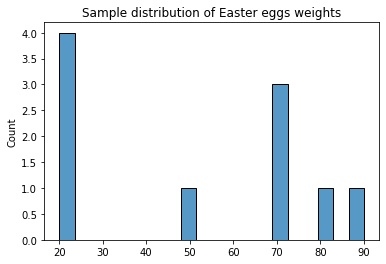

In [40]:
# Sample distribution
sns.histplot(x=eggs, bins=20)
plt.title('Sample distribution of Easter eggs weights')
plt.show()

* Intervalle de confiance

In [41]:
mu = np.mean(eggs)
sigma = np.std(eggs)
z = sigma / np.sqrt(len(eggs))
print('Mean:', mu, '\nStdev:', sigma, '\nStandard error:', z)

Mean: 51.0 
Stdev: 27.0 
Standard error: 8.538149682454623


In [42]:
#calculons l'intervalle de confiance à 95%
confidence_interval = (mu - 1.96*z, mu + 1.96*z)
confidence_interval

(34.26522662238894, 67.73477337761106)

* Intervalle de confiance bootstrappée

In [43]:
sample_mean = np.mean(eggs)
sample_mean

51.0

In [44]:
bootstrap_means = []
#faisons l'opération 5000 fois
for i in range(5000):
    #créer un nouvel échantillon entre les 10 valeurs de départ dans eggs
    temp_sample = np.random.choice(eggs, replace=True, size=len(eggs))
    #prenons la moyenne de cet échantillon
    temp_mean = np.mean(temp_sample)
    #mettons cette moyenne dans une liste
    bootstrap_means.append(temp_mean)

In [45]:
print(temp_sample)
print(bootstrap_means)

[20 90 70 80 20 80 80 70 70 70]
[51.0, 41.0, 64.0, 57.0, 45.0, 57.0, 43.0, 53.0, 42.0, 51.0, 70.0, 37.0, 58.0, 68.0, 51.0, 44.0, 39.0, 51.0, 53.0, 39.0, 45.0, 55.0, 53.0, 51.0, 45.0, 47.0, 47.0, 57.0, 45.0, 50.0, 56.0, 52.0, 43.0, 58.0, 47.0, 46.0, 46.0, 47.0, 57.0, 44.0, 25.0, 59.0, 48.0, 38.0, 67.0, 54.0, 46.0, 58.0, 47.0, 35.0, 51.0, 43.0, 50.0, 53.0, 56.0, 58.0, 35.0, 59.0, 57.0, 51.0, 47.0, 42.0, 53.0, 54.0, 67.0, 41.0, 58.0, 59.0, 45.0, 37.0, 51.0, 49.0, 46.0, 50.0, 52.0, 46.0, 51.0, 40.0, 45.0, 59.0, 64.0, 35.0, 58.0, 48.0, 40.0, 46.0, 51.0, 61.0, 61.0, 41.0, 47.0, 56.0, 42.0, 67.0, 41.0, 55.0, 49.0, 40.0, 52.0, 49.0, 51.0, 54.0, 39.0, 46.0, 48.0, 62.0, 49.0, 65.0, 44.0, 57.0, 53.0, 35.0, 49.0, 63.0, 51.0, 40.0, 48.0, 41.0, 62.0, 45.0, 53.0, 45.0, 47.0, 56.0, 46.0, 39.0, 46.0, 60.0, 46.0, 58.0, 54.0, 60.0, 52.0, 61.0, 55.0, 59.0, 53.0, 52.0, 53.0, 68.0, 56.0, 48.0, 51.0, 75.0, 50.0, 41.0, 51.0, 35.0, 57.0, 51.0, 43.0, 54.0, 51.0, 58.0, 43.0, 54.0, 48.0, 53.0, 44.0, 43.0, 39.0, 3

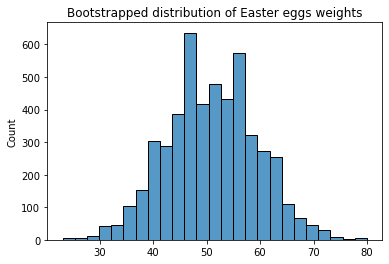

In [46]:
# Bootstrapped distribution 
sns.histplot(x=bootstrap_means, bins=25)
plt.title('Bootstrapped distribution of Easter eggs weights')
plt.show()

In [47]:
# Confidence interval based on bootstrapped distribution of means
centiles = np.percentile(bootstrap_means, [2.5, 97.5])
print(centiles)
bootstrapped_ci = (round(centiles[0], 2), round(centiles[1], 2))
bootstrapped_ci

[35. 67.]


(35.0, 67.0)

#### Usine de chaussures

Imaginons que l'on possède une usine qui produit des chaussures. On veut être capable de caractériser la taille moyenne des chaussures et être sûr qu'elles répondre à certaines spécificités. Notre usine produit des centaines de chaussures tous les jours, et il est impossible de mesurer la taille de toutes les chaussures. On a accès à un échantillon de 100 chaussures. On va bootstrapper ces 100 tailles de chaussures pour obtenir un intervalle de confiance de 95% de la taille moyenne de nos chaussures. 

Commencons par examiner la liste `shoe_lengths` qui référence les 100 tailles de chaussures observées.

In [48]:
#ici on créé une liste qui initialise 100 tailles de chaussures 
#un peu au hasard pour notre exemple
shoe_lengths = np.random.normal(25, 0.15, 100)
shoe_lengths

array([24.84710574, 24.81337349, 25.16510234, 24.78816146, 24.89269172,
       25.14646148, 24.69817331, 25.0688573 , 24.87036012, 24.8206271 ,
       25.12225557, 24.88041133, 24.83233129, 25.02862316, 25.03991346,
       24.74640764, 24.91035103, 24.99696955, 25.13087622, 24.85832823,
       24.84184332, 24.95568332, 24.91720475, 25.2490908 , 25.12309325,
       24.98535221, 25.25205295, 24.83714877, 24.96163615, 25.15073402,
       25.01967335, 25.03276916, 24.90478953, 25.02919862, 24.69211873,
       25.01603889, 24.86908972, 24.9029353 , 25.08801187, 25.0356099 ,
       25.03698985, 24.98906587, 24.86250818, 24.946283  , 24.99187859,
       25.03180945, 24.80529368, 24.72992907, 25.24235237, 25.20554661,
       24.93336373, 25.18490071, 24.94560833, 25.01928667, 25.07069833,
       25.33308162, 24.90424012, 24.86710779, 25.02733187, 25.1980969 ,
       24.8640097 , 24.78944577, 25.13954789, 25.0244407 , 25.07721381,
       25.11920115, 25.05847149, 25.22708983, 25.10425119, 25.35

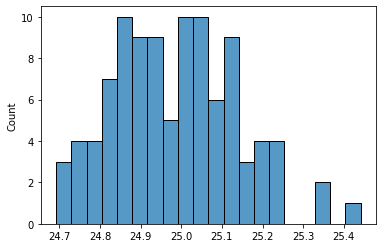

In [49]:
sns.histplot(shoe_lengths, bins=20);

* Intervalle de confiance théorique

In [50]:
mu = np.mean(shoe_lengths)
sigma = np.std(shoe_lengths)
z = sigma / np.sqrt(len(shoe_lengths))
print('Mean:', mu, '\nStdev:', sigma, '\nStandard error:', z)

confidence_interval = (mu - 1.96*z, mu + 1.96*z)
confidence_interval

Mean: 24.985294112603125 
Stdev: 0.1525333281121378 
Standard error: 0.01525333281121378


(24.955397580293145, 25.015190644913105)

* Intervalle de confiance bootstrappée

Encore une fois, le bootstrapping consiste à tirer pleins d'échantillons  de taille `len(shoe_lengths)` (100 içi) de manière aléatoire avec remplacement (par exemple >1000), et en suite calculer la taille moyenne de chaque échantillon.

In [51]:
bootstrap_means = []
for i in range(1000):
    temp_sample = np.random.choice(shoe_lengths, replace=True, size=len(shoe_lengths))
    temp_mean = np.mean(temp_sample)
    bootstrap_means.append(temp_mean)
    
bootstrap_means

[24.979398080530753,
 24.992349416689052,
 24.979779269393166,
 25.006784966674385,
 24.975675422504988,
 24.984938288410152,
 24.996428188147185,
 24.99585847104416,
 24.974893365001744,
 24.993066042769144,
 25.014183504274506,
 24.998337692400376,
 24.95362142128748,
 24.988951991038967,
 24.990926394672236,
 24.9933403460701,
 25.012041640999687,
 25.00308220185215,
 24.96950657102333,
 24.985702264022983,
 24.998710472827323,
 24.994087335768672,
 24.988656873151267,
 24.992988876522187,
 25.009434031324957,
 25.00675035462159,
 24.984142370230806,
 24.99677895561678,
 24.979939636512253,
 24.989621627606518,
 24.996188144851825,
 24.973738446735016,
 24.977405976130804,
 25.014557063659677,
 24.99488454996288,
 24.96455036944204,
 25.029344997552656,
 24.986903043113546,
 24.982973187676638,
 24.99772093763913,
 25.002797295446467,
 24.97628905337992,
 24.993754789663445,
 24.985909799207594,
 24.971755441038194,
 24.988254984390743,
 24.995829914314818,
 24.986393794674,
 24.996

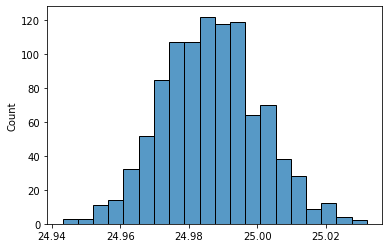

In [52]:
sns.histplot(bootstrap_means, bins=20);

Enfin, on calcul un intervalle de confiance de 95% bootstrappé (`boot_95_ci`) en utilisant `np.percentile()`.

In [53]:
# Ici on en déduit que si on prend n'importe quel échantillon il y a 95% 
# de chance que notre taille moyenne se trouve dans l'intervalle de confiance
# par extension, la population totale est un échantillon, donc la vraie taille
#moyenne a 95% de chance de se trouver dans cette intervalle
boot_95_ci = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% Bootstrapped CI = {}".format(boot_95_ci))

95% Bootstrapped CI = [24.95966672 25.01457473]
